In [10]:
import requests
import pandas as pd
# import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import traceback2
import time
import pymysql

In [11]:
# Configs

# CoinMarketCap.com API Key
api_key = "a86e3326-8c8d-434e-897a-5d6becbf1f35"
read_data_from_file = True


In [15]:
def __connect__():
    db_user = 'coin'
    db_password = 'dragonstone#123'
    db_name = 'master_data'
    db_host = 'localhost'
    return pymysql.connect(
        unix_socket=None,
        host=db_host,
        user=db_user,
        password=db_password,
        db=db_name,
        charset='latin1',
        cursorclass=pymysql.cursors.DictCursor)


def get_cursor(connection):
    if connection is None:
        connection = __connect__()
    connection.ping(reconnect=True)
    return connection.cursor()



sql = "select * from cmc_coin_ohlc where symbol in ('BTC','BTC','ETH','BNB','XRP','USDT','ADA','DOT','UNI','LTC','LINK','BCH','THETA','XLM','FIL','USDC','TRX','DOGE','WBTC','KLAY','VET','EOS','LUNA','SOL','CRO','BTT','AAVE','BSV','XMR','MIOTA','XTZ','ATOM','NEO','FTT','AVAX','BUSD','XEM','KSM','ALGO','HOT','HT','DAI','EGLD','DASH','CAKE','HBAR','SNX','COMP','CHZ','DCR','NEAR','BTCB','GRT','ZIL','MKR','RUNE','ZEC','STX','ETC','LEO','ENJ','SUSHI','MATIC','TFUEL','BAT','UST','NPXS','UMA','NEXO','RVN','YFI','CEL','HNT','ONT','BTG','MANA','ICX','DENT','ZRX','SC','WAVES','ONE','BNT','QTUM','OMG','FTM','DGB','FLOW','CHSB','REN','RSR','OKB','REV','ANKR','PAX','CELO','AR','VGX','CFX','BTMX','IOST','WRX','XVG','1INCH','OGN','CRV','DODO','KCS','CKB','LSK','HUSD','NANO','SNT','KNC','LPT','LRC','ZEN','RENBTC','ZKS','OCEAN','STORJ','KIN','STMX','WIN','BTCST','MED','HEDG','GLM','MVL','VTHO','EWT','ANT','XVS','ALPHA','REP','FET','FUN','MAID','IOTX','ORBS','SKL','QNT','KAVA','REEF','SAND','WAXP','STEEM','CVC','BAL','META','AGI','CELR','SXP','NKN','BTS','TEL','BAND','BADGER','BCD','ARDR','VLX','MTL','UBT','POLY','SWAP','NMR','JST','WAN','ARK','MDX','TUSD','KMD','XOR','STRAX','SRM','MARO','UTK','IQ','TRAC','OXT','QKC','BORA','ROSE','CVT','BTM','AVA','NOIA','RIF','COTI','POWR','ELF','ALICE','POLS','NU','GNO','MFT','RLC','HIVE','TOMO','XHV','ZB','DREP','HEX','CTC','FEI','WBNB','CCXX','ORC','HBTC','OMI','DFI','BRG','INO','XWC','THR','TTT','BEST','vBNB','XDC','BCHA','ETN','NXM','KSP','MIR','XIN','LINA','TRIBE','ZLW','STETH','RFOX','ORN','KEEP','SOLO','AKT','AXS','KLV','ATT','SFP','MATH','AUDIO','HTR','PAID','AMP','GNY','EAURIC','EDG','SUPER','vXVS','ANC','ERN','TROY','RAY','vBTC','BCN','DAWN','PRQ','LTO','HNS','IRIS','INJ','PIB','SCRT','AION','SYS','MLK','AMPL','USDN','SUN','RDD','PPT','MCO','WOO','LOOM','DKA','RNDR','DATA','AMO','SPI','KAI','CRE','HNC','AKRO','DUSK','TT','MASK','DNT','BAKE','LIT','GT','POND','MLN','ATRI','ID','PERP','TWT','TSHP','BIOT','DDX','MWC','SHR','CTSI','WHALE','XCM','LAMB','UOS','WTC','GALA','UQC','RFR','VAI','PHA','RPL','STAKE','IGNIS','EUM','VSP','LON','ELA','EPS','RAMP','NRG','REQ','NYE','GAS','APL','TVK','FLM','SOLVE','ADX','PAC','OXY','VRA','MONA','BLZ','BZRX','CHR','BEL','SFI','SUSD','SAPP','DSLA','STRK','EDR','NULS','BIFI','BLCT','DIVI','RLY','MBL','DEGO','SURE','MRPH','DIA','CTK','FIRO','HUM','BNANA','RGT','REV','FRM','MITH','FARM','GUSD','GRN','DX','HARD','DRS','OM','ARPA','PIVX','ABBC','API3','COS','CRU','VID','REVV','TITAN','CENNZ','UPP','YFII','MXC','DRGN','SRK','NEST','LOC','TRB','DAO','LBC','PCX','WOZX','VSYS','BOA','FRAX','NXS','BOTX','ALBT','BSCPAD','NRV','AERGO','KEY','ZNN','PERL','RING','FIO','BEAM','MASS','NWC','PHB','PAXG','EXRD','XNC','CND','FRONT','KIMCHI','BAAS','DDIM','DVC','MBN','FX','MUSH','SWTH','UNFI','EVZ','WNXM','MX','HEGIC','SPND','WICC','CREAM','vUSDC','HPT','VITE','AUCTION','DCN','EMC2','LA','DAG','GRS','BELT','STPT','QSP','SUKU','GET','ZEE','EL','ESD','HAI','OBSR','HXRO','AE','NFTX','WING','MOC','DOCK','CTXC','EASY','SKY','YOUC','IDEX','SLT','vETH','PXL','PROM','MAPS','SPARTA','AST','FXS','SWINGBY','NIM','XPR','PNT','KYL','TMTG','DMT','GTO','ZCN','RCN','TORN','TRTL','BOR','QTCON','SNTVT','BOND','KDA','AOA','SNL','AXEL','OCTO','ARRR','BDP','GXC','OXEN','SOUL','NAS','DG','DAC','ERG','SERO','MITX','HC','WABI','MEME','GO','DEXT','GRIN','PNT','AQT','XLT','RAD','VIDT','QC','XDB','FSN','BFC','TRU','BDX','NXT','PAI','MHC','INSUR','CSC','N8V','BLANK','TEMCO','DIP','DEXE','RDN','QQQ','COCOS','CVP','VIDY','NCASH','XYO','QASH','SBD','CAS','BASID','YLD','POOLZ','DORA','XRT','BMI','PNK','DUCK','BURGER','LYXe','PMON','FXF','HUNT','KAN','MDT','CORE','DMCH','aEth','AUTO','DAD','EURS','JULD','PTF','REW','NEX','BASIC','GHST','vBUSD','NEBL','NAV','VITAE','BTU','HELMET','RBTC','ORAI','LABS','FIDA','PRO','POLK','KRT','PCM','FCT','TON','LCX','XSN','MIX','BIP','USDX','BONDLY','SUTER','GAME','ANY','MTA','ALEPH','DF','MAP','GVT','DVPN','ONE','BZ','ZAP','TCT','VRSC','BFT','MPH','ASTA','KP3R','SHA','ANW','WXT','ICHI','DIGG','BRD','PEAK','BNK','APPC','CUSD','BANK','WPR','DERO','mTSLA','JUL','RBC','LYM','OAX','HPB','VTC','VERI','DGD','MUSD','SALT','FIS','STAX','APY','VNLA','MOF','SOC','DBC','BOT','MOON','RINGX','SIX','CRPT','HIT','DHT','CDT','XPRT','PRE','UFT','FST','POA','MET','TLOS','TONE','NSBT','OST','PI','BTR','BTRS','CXO','BUX','BEPRO','SHROOM','MATTER','FOR','vSXP','EGG','CUDOS','CUT','GEO','BAX','FWT','RAZOR','RFUEL','ETP','BAO','PAY','KONO','QRL','PROPS','FOAM','mNFLX','LAYER','RARI','ULT','MUSE','NIOX','CON','MARK','LTX','OPCT','VIA','CS','AGA','XSGD','mTWTR','MTH','CLB','mAMZN','OPIUM','CMT','vUSDT','EXNT','XEND','MXX','mIAU','WOM','BLINK','COVER','HEZ','TXL','TOP','RKN','IHF','mSLV','NPXSXEM','mAAPL','GBYTE','NEW','CWS','FREE','GAL','DYN','MDA','NIX','mUSO','mMSFT','USDK','mQQQ','FLETA','DOV','UMX','QLC','KDAG','mVIXY','HMR','SSX','BMXX','ODDZ','FNB','mBABA','EFX','DUCATO','LGO','TRUE','LGCY','YOP','DEC','UMB','ABT','ACT','DLT','CBK','SNM','WHITE','BLOCK','ADK','EVX','KAT','BHD','ARMOR','PSG','SNGLS','TNC','YOYOW','SMART','TIDAL','CARD','JGN','SAKE','ROOM','SOCKS','QCX','CLO','$ANRX','DAPP','VIB','WGR','DOS','WIKEN','MDS','NVT','FCT','DNA','YF-DAI','ELAMA','XDN','NMC','IGG','S4F','ESS','MINT','AWC','EGG','APYS','KICK','CGG','BF','L2','TRV','DOKI','PMA','AUC','BURST','VEE','ROOBEE','ACM','vLINK','EGT','UBQ','UNISTAKE','PPC','ACH','COVAL','TKY','IPX','ASK','STRONG','MTV','TRIX','ABYSS','DGTX','JUV','PKF','EBST','FSW','VALOR','EMRX','HOT','SYLO','SCC','XCASH','MCI','DEV','DVP','SFT','DOWS','COV','APIX','CV','MAN','YUSRA','MTRG','AMB','SWRV','BOLT','FLUX','vLTC','SLP','ZEON','OIN','SLICE','TRADE','DTA','NCT','ZYN','EUNO','VAL','PICKLE','ANJ','&#932;BTC','TEN','EOSC','SWFTC','ROUTE','XSR','CSP','MWAT','HTML','CET','XPX','ZANO','BOND','SRN','UIP','MFG','RUFF','FIC','BAC','BIRD','GLCH','SOAR','PZM','XPN','ARDX','BLY','FLO','HGET','ARGON','BMX','PAR','APM','AMLT','DMST','WEST','EM','AME','LUA','ITC','DRC','FUSE','USDJ','CNTR','BAN','KEX','YFL','AUTO','SAN','PCL','PLR','RVC','BTC2','PRT','SMT','GNX','RAVEN','IQN','NFY','GLEEC','FNX','WINGS','DEPAY','KRL','UDO','GSWAP','GEEQ','vDOT','ABL','PRS','RIO','CRD','EMC','BIKI','BHAO','PROS','ROOK','BNF','LEVL','NFT','TFB','BRY','KCASH','OG','MOBI','BCDT','GOM2','DRC','PAINT','BALPHA','IDLE','SENSO','TAU','TNB','FIN','BWF','CTCN','MVP','RFI','TKN','GRO','GEN','CNN','JOB','TERA','BHP','OCN','XMC','CHI','VIDYA','ASR','LET','CAPP','GAP','ATP','JUP','SPC','SYNC','LIKE','FLG','WINR','DYP','VIBE','MIR','PLTC','HAPI','AZUKI','PART','INXT','XIO','AXPR','WATCH','TRTT','KTON','OLT','DMD','UUU','BPS','BIX','INFI','BHC','OCE','OGO','XFT','OPEN','PHNX','BCP','XMX','PLC','COMBO','DERI','FO','EVED','WPP','SWM','PLAY','KTLYO','ENQ','MTLX','MAHA','HDAO','CNS','VDG','SNOW','ISR','TIPS','FOL','NORD','AYA','LBA','ADB','CPC','TOWER','PAT','CWV','SMARTCREDIT','HAKKA','ANCT','INT','XTP','STA','ZT','AITRA','TIME','CVN','CBC','XPC','LDO','OPEN','GXT','DEXA','MONA','GARD','ILV','TERC','BTSE','LBTC','DEP','NPX','ZEFU','CHONK','TONS','CHP','FNT','SNB','CEEK','AOG','PLOT','SEELE','MYST','SCC','SPAZ','FTC','SWG','NSURE','GTC','GMB','PBR','URUS','YOU','YIELD','PGN','MTC','DOUGH','XMY','EKT','CHX','EQUAD','RMT','ARCH','AEON','NSR','FYZ','GRID','0xBTC','SIG','SEEN','EXRN','PLF','SNC','SAFE','VNXLU','YEED','TYPE','PLU','ETHV')"


df = pd.read_sql_query(sql, __connect__())


In [19]:
df2 = df.copy()

In [84]:
df = df2.copy()

In [85]:
del df['O']
del df['H']
del df['L']

In [86]:

def convert_symbols_to_columns(df):
    df = df.pivot(columns='symbol', values='C')
    return df

In [87]:
df = convert_symbols_to_columns(df)

In [88]:
df

symbol,$ANRX,0xBTC,1INCH,AAVE,ABBC,ABL,ABT,ABYSS,ACH,ACM,...,vBTC,vBUSD,vDOT,vETH,vLINK,vLTC,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2020-12-18 12:59:00,NaN,NaN,NaN,85.004864,0.269067,NaN,NaN,NaN,NaN,NaN,...,459.347042,0.020052,NaN,13.012786,NaN,NaN,0.018408,0.020062,0.020057,0.076569
2020-12-18 13:59:00,NaN,NaN,NaN,84.408217,0.266957,NaN,NaN,NaN,NaN,NaN,...,455.054903,0.020048,NaN,12.823560,NaN,NaN,0.018288,0.020062,0.020055,0.075253
2020-12-18 14:59:00,NaN,NaN,NaN,84.773783,0.266599,NaN,NaN,NaN,NaN,NaN,...,454.530749,0.020052,NaN,12.771453,NaN,NaN,0.018134,0.020059,0.020055,0.076788
2020-12-18 15:59:00,NaN,NaN,NaN,84.213532,0.265406,NaN,NaN,NaN,NaN,NaN,...,451.914639,0.020054,NaN,12.790518,NaN,NaN,0.018201,0.020059,0.020062,0.078256
2020-12-18 16:59:00,NaN,NaN,NaN,85.380934,0.267835,NaN,NaN,NaN,NaN,NaN,...,453.615689,0.020053,NaN,12.848591,NaN,NaN,0.018256,0.020060,0.020065,0.080411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,1.414371,5.248976,400.636312,0.157706,0.059022,0.285513,0.090428,0.013206,10.651928,...,1168.681704,0.020435,0.885202,42.240109,0.633240,4.405706,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,1.427259,5.244245,397.968598,0.158297,0.056738,0.273169,0.090349,0.013278,10.727912,...,1171.497539,0.020439,0.883656,42.109988,0.638232,4.433584,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,1.405691,5.479503,403.416591,0.157380,0.058443,0.276518,0.090759,0.013235,10.770537,...,1183.240489,0.020433,0.889615,42.589740,0.651338,4.531054,0.097369,0.020352,0.020436,1.113714


In [89]:

# df.index = pd.DatetimeIndex(df['timestamp_dt'])
df = df[df.index >= datetime(2021, 1,15)]
df

symbol,$ANRX,0xBTC,1INCH,AAVE,ABBC,ABL,ABT,ABYSS,ACH,ACM,...,vBTC,vBUSD,vDOT,vETH,vLINK,vLTC,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2021-01-15 00:59:00,0.041131,0.210628,1.355945,149.808879,0.255260,0.011936,0.084313,0.019945,0.003099,NaN,...,771.126942,0.020130,0.290044,24.723448,0.360743,3.078754,0.017452,0.020132,0.020136,0.085787
2021-01-15 01:59:00,0.041099,0.207394,1.360176,148.131014,0.258533,0.011839,0.084026,0.019938,0.003128,NaN,...,770.257418,0.020134,0.286551,24.606359,0.358844,3.038597,0.017824,0.020135,0.020136,0.083735
2021-01-15 02:59:00,0.040961,0.202133,1.346056,148.339103,0.257562,0.012066,0.084166,0.020022,0.003086,NaN,...,770.934968,0.020138,0.284689,24.666049,0.365052,3.055721,0.018394,0.020136,0.020141,0.085494
2021-01-15 03:59:00,0.041158,0.196756,1.317422,147.012698,0.253045,0.011580,0.083996,0.020053,0.003074,NaN,...,761.768114,0.020132,0.277082,24.302238,0.358302,2.993916,0.017860,0.020135,0.020138,0.084429
2021-01-15 04:59:00,0.041057,0.197998,1.299448,148.445804,0.247918,0.011383,0.084044,0.019995,0.003067,NaN,...,757.715134,0.020136,0.279084,24.215130,0.360817,2.978590,0.017751,0.020133,0.020141,0.083602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,1.414371,5.248976,400.636312,0.157706,0.059022,0.285513,0.090428,0.013206,10.651928,...,1168.681704,0.020435,0.885202,42.240109,0.633240,4.405706,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,1.427259,5.244245,397.968598,0.158297,0.056738,0.273169,0.090349,0.013278,10.727912,...,1171.497539,0.020439,0.883656,42.109988,0.638232,4.433584,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,1.405691,5.479503,403.416591,0.157380,0.058443,0.276518,0.090759,0.013235,10.770537,...,1183.240489,0.020433,0.889615,42.589740,0.651338,4.531054,0.097369,0.020352,0.020436,1.113714


In [90]:
df

symbol,$ANRX,0xBTC,1INCH,AAVE,ABBC,ABL,ABT,ABYSS,ACH,ACM,...,vBTC,vBUSD,vDOT,vETH,vLINK,vLTC,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2021-01-15 00:59:00,0.041131,0.210628,1.355945,149.808879,0.255260,0.011936,0.084313,0.019945,0.003099,NaN,...,771.126942,0.020130,0.290044,24.723448,0.360743,3.078754,0.017452,0.020132,0.020136,0.085787
2021-01-15 01:59:00,0.041099,0.207394,1.360176,148.131014,0.258533,0.011839,0.084026,0.019938,0.003128,NaN,...,770.257418,0.020134,0.286551,24.606359,0.358844,3.038597,0.017824,0.020135,0.020136,0.083735
2021-01-15 02:59:00,0.040961,0.202133,1.346056,148.339103,0.257562,0.012066,0.084166,0.020022,0.003086,NaN,...,770.934968,0.020138,0.284689,24.666049,0.365052,3.055721,0.018394,0.020136,0.020141,0.085494
2021-01-15 03:59:00,0.041158,0.196756,1.317422,147.012698,0.253045,0.011580,0.083996,0.020053,0.003074,NaN,...,761.768114,0.020132,0.277082,24.302238,0.358302,2.993916,0.017860,0.020135,0.020138,0.084429
2021-01-15 04:59:00,0.041057,0.197998,1.299448,148.445804,0.247918,0.011383,0.084044,0.019995,0.003067,NaN,...,757.715134,0.020136,0.279084,24.215130,0.360817,2.978590,0.017751,0.020133,0.020141,0.083602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,1.414371,5.248976,400.636312,0.157706,0.059022,0.285513,0.090428,0.013206,10.651928,...,1168.681704,0.020435,0.885202,42.240109,0.633240,4.405706,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,1.427259,5.244245,397.968598,0.158297,0.056738,0.273169,0.090349,0.013278,10.727912,...,1171.497539,0.020439,0.883656,42.109988,0.638232,4.433584,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,1.405691,5.479503,403.416591,0.157380,0.058443,0.276518,0.090759,0.013235,10.770537,...,1183.240489,0.020433,0.889615,42.589740,0.651338,4.531054,0.097369,0.020352,0.020436,1.113714


### Cleaning data and filling

In [91]:
del df['USDT']
del df['USDC']
del df['DAI']
del df['BUSD']
del df['HUSD']
del df['TUSD']
del df['BTC']


In [92]:
data_values_df = pd.DataFrame(df.isna().sum(), columns= ['nan_count'])
tmp_df = pd.DataFrame(df.count(), columns= ['values_count'])
data_values_df['values_count'] = tmp_df['values_count']
data_values_df['rows_count'] = data_values_df['values_count'] + data_values_df['nan_count']
print(data_values_df)
delete_coin_df = data_values_df[data_values_df['nan_count'] > (data_values_df['values_count']*.20)]
delete_coin_df.sort_values(['nan_count'])

        nan_count  values_count  rows_count
symbol                                     
$ANRX           0          1956        1956
0xBTC           0          1956        1956
1INCH           0          1956        1956
AAVE            0          1956        1956
ABBC            0          1956        1956
...           ...           ...         ...
vLTC            0          1956        1956
vSXP            0          1956        1956
vUSDC           0          1956        1956
vUSDT           0          1956        1956
vXVS            0          1956        1956

[1074 rows x 3 columns]


,nan_count,values_count,rows_count
symbol,,,
BMI,387,1569,1956
CWS,419,1537,1956
WNXM,422,1534,1956
MAPS,423,1533,1956
FIC,458,1498,1956
...,...,...,...
PMON,1816,140,1956
STRK,1824,132,1956
XPRT,1837,119,1956


### will delete below coins as most of the values are not available

In [93]:
symbols_del = delete_coin_df.index.tolist()
for symbol in symbols_del:
    print(f'Deleteing Coin: {symbol}')
    del df[symbol]

Deleteing Coin: ACM
Deleteing Coin: ALICE
Deleteing Coin: ANC
Deleteing Coin: APYS
Deleteing Coin: ARGON
Deleteing Coin: AUCTION
Deleteing Coin: AUTO
Deleteing Coin: BALPHA
Deleteing Coin: BANK
Deleteing Coin: BCP
Deleteing Coin: BDP
Deleteing Coin: BELT
Deleteing Coin: BIOT
Deleteing Coin: BLANK
Deleteing Coin: BMI
Deleteing Coin: BMXX
Deleteing Coin: BRY
Deleteing Coin: BSCPAD
Deleteing Coin: CGG
Deleteing Coin: CWS
Deleteing Coin: DAO
Deleteing Coin: DERI
Deleteing Coin: DORA
Deleteing Coin: DOWS
Deleteing Coin: EGG
Deleteing Coin: EPS
Deleteing Coin: ERN
Deleteing Coin: FEI
Deleteing Coin: FIC
Deleteing Coin: FXF
Deleteing Coin: HAPI
Deleteing Coin: ID
Deleteing Coin: ILV
Deleteing Coin: INSUR
Deleteing Coin: KONO
Deleteing Coin: KYL
Deleteing Coin: LABS
Deleteing Coin: LIT
Deleteing Coin: MAPS
Deleteing Coin: MASK
Deleteing Coin: MATTER
Deleteing Coin: MINT
Deleteing Coin: MUSH
Deleteing Coin: NFT
Deleteing Coin: NRV
Deleteing Coin: ODDZ
Deleteing Coin: OMI
Deleteing Coin: OXY
Del

In [94]:
df

symbol,$ANRX,0xBTC,1INCH,AAVE,ABBC,ABL,ABT,ABYSS,ACH,ACT,...,vBTC,vBUSD,vDOT,vETH,vLINK,vLTC,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2021-01-15 00:59:00,0.041131,0.210628,1.355945,149.808879,0.255260,0.011936,0.084313,0.019945,0.003099,0.006884,...,771.126942,0.020130,0.290044,24.723448,0.360743,3.078754,0.017452,0.020132,0.020136,0.085787
2021-01-15 01:59:00,0.041099,0.207394,1.360176,148.131014,0.258533,0.011839,0.084026,0.019938,0.003128,0.006851,...,770.257418,0.020134,0.286551,24.606359,0.358844,3.038597,0.017824,0.020135,0.020136,0.083735
2021-01-15 02:59:00,0.040961,0.202133,1.346056,148.339103,0.257562,0.012066,0.084166,0.020022,0.003086,0.006824,...,770.934968,0.020138,0.284689,24.666049,0.365052,3.055721,0.018394,0.020136,0.020141,0.085494
2021-01-15 03:59:00,0.041158,0.196756,1.317422,147.012698,0.253045,0.011580,0.083996,0.020053,0.003074,0.006703,...,761.768114,0.020132,0.277082,24.302238,0.358302,2.993916,0.017860,0.020135,0.020138,0.084429
2021-01-15 04:59:00,0.041057,0.197998,1.299448,148.445804,0.247918,0.011383,0.084044,0.019995,0.003067,0.006680,...,757.715134,0.020136,0.279084,24.215130,0.360817,2.978590,0.017751,0.020133,0.020141,0.083602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,1.414371,5.248976,400.636312,0.157706,0.059022,0.285513,0.090428,0.013206,0.029410,...,1168.681704,0.020435,0.885202,42.240109,0.633240,4.405706,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,1.427259,5.244245,397.968598,0.158297,0.056738,0.273169,0.090349,0.013278,0.029359,...,1171.497539,0.020439,0.883656,42.109988,0.638232,4.433584,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,1.405691,5.479503,403.416591,0.157380,0.058443,0.276518,0.090759,0.013235,0.028992,...,1183.240489,0.020433,0.889615,42.589740,0.651338,4.531054,0.097369,0.020352,0.020436,1.113714


In [99]:
df.ffill(inplace=True)
data_values_df = pd.DataFrame(df.isna().sum().copy(), columns= ['nan_count'])
tmp_df = pd.DataFrame(df.count(), columns= ['values_count'])
data_values_df['values_count'] = tmp_df['values_count']
data_values_df['rows_count'] = data_values_df['values_count'] + data_values_df['nan_count']
# print(data_values_df)
delete_coin_df = data_values_df[data_values_df['nan_count'] > 10]
print(delete_coin_df.sort_values(['nan_count']))

df = df.dropna(axis = 1)

Empty DataFrame
Columns: [nan_count, values_count, rows_count]
Index: []


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [97]:
df

symbol,$ANRX,0xBTC,1INCH,AAVE,ABBC,ABL,ABT,ABYSS,ACH,ACT,...,vBTC,vBUSD,vDOT,vETH,vLINK,vLTC,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2021-01-15 00:59:00,0.041131,0.210628,1.355945,149.808879,0.255260,0.011936,0.084313,0.019945,0.003099,0.006884,...,771.126942,0.020130,0.290044,24.723448,0.360743,3.078754,0.017452,0.020132,0.020136,0.085787
2021-01-15 01:59:00,0.041099,0.207394,1.360176,148.131014,0.258533,0.011839,0.084026,0.019938,0.003128,0.006851,...,770.257418,0.020134,0.286551,24.606359,0.358844,3.038597,0.017824,0.020135,0.020136,0.083735
2021-01-15 02:59:00,0.040961,0.202133,1.346056,148.339103,0.257562,0.012066,0.084166,0.020022,0.003086,0.006824,...,770.934968,0.020138,0.284689,24.666049,0.365052,3.055721,0.018394,0.020136,0.020141,0.085494
2021-01-15 03:59:00,0.041158,0.196756,1.317422,147.012698,0.253045,0.011580,0.083996,0.020053,0.003074,0.006703,...,761.768114,0.020132,0.277082,24.302238,0.358302,2.993916,0.017860,0.020135,0.020138,0.084429
2021-01-15 04:59:00,0.041057,0.197998,1.299448,148.445804,0.247918,0.011383,0.084044,0.019995,0.003067,0.006680,...,757.715134,0.020136,0.279084,24.215130,0.360817,2.978590,0.017751,0.020133,0.020141,0.083602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,1.414371,5.248976,400.636312,0.157706,0.059022,0.285513,0.090428,0.013206,0.029410,...,1168.681704,0.020435,0.885202,42.240109,0.633240,4.405706,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,1.427259,5.244245,397.968598,0.158297,0.056738,0.273169,0.090349,0.013278,0.029359,...,1171.497539,0.020439,0.883656,42.109988,0.638232,4.433584,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,1.405691,5.479503,403.416591,0.157380,0.058443,0.276518,0.090759,0.013235,0.028992,...,1183.240489,0.020433,0.889615,42.589740,0.651338,4.531054,0.097369,0.020352,0.020436,1.113714


### scalling up the price as most of the values are less than 1

In [37]:
# df = df.fillna(1)*1

In [38]:
df

symbol,$ANRX,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AERGO,AGA,...,mSLV,mTSLA,vBNB,vBTC,vBUSD,vETH,vSXP,vUSDC,vUSDT,vXVS
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:59:00,0.037285,2.156469,79.047692,0.232579,0.156314,0.237664,0.282636,0.096524,0.038545,0.351609,...,23.832237,651.567322,0.676365,385.854162,0.020073,12.517667,0.014099,0.020077,0.020079,0.077746
2020-12-26 01:59:00,0.037452,1.997356,78.604263,0.233077,0.155405,0.239798,0.283907,0.096554,0.038662,0.353060,...,23.834181,651.620467,0.670671,390.074629,0.020067,12.558941,0.014111,0.020076,0.020078,0.076758
2020-12-26 02:59:00,0.037482,1.958763,78.041479,0.232716,0.154841,0.239103,0.281975,0.096882,0.038483,0.352552,...,23.839882,651.776334,0.669883,389.589026,0.020072,12.519314,0.014032,0.020076,0.020084,0.075361
2020-12-26 03:59:00,0.037121,1.984562,78.633204,0.233881,0.154814,0.239945,0.283157,0.097138,0.038274,0.357344,...,23.841729,651.826826,0.671607,390.392883,0.020070,12.669621,0.014177,0.020075,0.020077,0.075383
2020-12-26 04:59:00,0.037077,2.080424,78.103025,0.233778,0.153764,0.240829,0.281705,0.097051,0.038498,0.354754,...,23.827758,651.444874,0.665005,389.794408,0.020072,12.609547,0.014023,0.020077,0.020076,0.075108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:59:00,0.286092,5.248976,400.636312,0.157706,1.202645,0.899264,1.494896,0.265441,0.436683,4.044329,...,23.651051,694.200137,7.598473,1168.681704,0.020435,42.240109,0.097000,0.020354,0.020439,1.109992
2021-04-06 08:59:00,0.290731,5.244245,397.968598,0.158297,1.201200,0.918379,1.356086,0.261502,0.432915,4.020513,...,23.644201,693.999076,7.656055,1171.497539,0.020439,42.109988,0.094279,0.020358,0.020435,1.103440
2021-04-06 09:59:00,0.307407,5.479503,403.416591,0.157380,1.205952,0.867543,1.354830,0.268179,0.433202,4.071853,...,23.652568,694.244677,7.802924,1183.240489,0.020433,42.589740,0.097369,0.020352,0.020436,1.113714


## coins that will be used in portfolio cretions

In [11]:
print(df.columns.values)

['1INCH' 'AAVE' 'ABBC' 'ADA' 'ADK' 'ADX' 'AE' 'AGI' 'AION' 'AKRO' 'AKT'
 'ALBT' 'ALEPH' 'ALGO' 'ALPHA' 'AMP' 'AMPL' 'ANKR' 'ANT' 'ANY' 'API3' 'AR'
 'ARDR' 'ARK' 'ARPA' 'ARRR' 'AST' 'ASTA' 'ATOM' 'ATT' 'AUDIO' 'AVA' 'AVAX'
 'AXEL' 'AXS' 'BAC' 'BADGER' 'BAKE' 'BAL' 'BAND' 'BASIC' 'BASID' 'BAT'
 'BCD' 'BCH' 'BCHA' 'BCN' 'BDX' 'BEAM' 'BEL' 'BEST' 'BIFI' 'BLCT' 'BLZ'
 'BNANA' 'BNB' 'BNK' 'BNT' 'BOA' 'BOND' 'BONDLY' 'BOR' 'BORA' 'BOT' 'BOTX'
 'BPS' 'BRG' 'BSV' 'BTCB' 'BTG' 'BTM' 'BTMX' 'BTRS' 'BTS' 'BTT' 'BTU'
 'BURGER' 'BZRX' 'CAKE' 'CAS' 'CCA' 'CCXX' 'CEL' 'CELO' 'CELR' 'CENNZ'
 'CHSB' 'CHZ' 'CIPHC' 'CKB' 'CND' 'COCOS' 'COMP' 'CORE' 'COS' 'COTI' 'CRD'
 'CRE' 'CREAM' 'CRO' 'CRV' 'CTC' 'CTK' 'CTSI' 'CTXC' 'CUSD' 'CVC' 'CVP'
 'CVT' 'DAD' 'DASH' 'DATA' 'DCR' 'DDIM' 'DDX' 'DENT' 'DEXT' 'DF' 'DFI'
 'DGB' 'DGD' 'DIA' 'DIP' 'DIVI' 'DMCH' 'DNT' 'DODO' 'DOGE' 'DOT' 'DRGN'
 'DRS' 'DUCATO' 'DUCK' 'DUSK' 'DX' 'EASY' 'EAURIC' 'EDG' 'EGLD' 'ELA'
 'ELF' 'EMC2' 'ENJ' 'EOS' 'ERG' 'ESD' 'ETC' 'ETH' 'ETN' 'EU

In [12]:
print(len(df.columns.values))

473


In [13]:
df.index = df.index + timedelta(seconds=60)

### Resampling: 6 hour data (last row of 6 hour data)


In [14]:
_6_hour_resampled_df = df.resample('6H').last()
_6_hour_resampled_df

,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AGI,AION,AKRO,...,ZLW,ZNN,ZRX,aEth,vBNB,vBTC,vBUSD,vETH,vUSDT,vXVS
time,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:00:00,2.080424,78.103025,0.233778,0.153764,0.240829,0.281705,0.097051,0.047527,0.067153,0.010500,...,3.904283,2.181974,0.363838,595.037789,0.665005,389.794408,0.020072,12.609547,0.020076,0.075108
2020-12-26 06:00:00,1.720885,76.603357,0.225378,0.150457,0.237320,0.280167,0.091283,0.045322,0.067696,0.010086,...,4.312154,2.090445,0.357418,582.361054,0.657407,495.438850,0.020069,12.389697,0.020079,0.073076
2020-12-26 12:00:00,1.724614,77.438544,0.225390,0.157651,0.241006,0.290773,0.093443,0.045648,0.068556,0.010381,...,4.491715,1.808067,0.364698,608.059805,0.674635,519.003478,0.020069,12.912827,0.020072,0.074257
2020-12-26 18:00:00,1.628263,74.901797,0.224906,0.157108,0.244366,0.288472,0.090494,0.045738,0.067473,0.009843,...,4.490311,1.862440,0.354527,590.682935,0.665650,528.179218,0.020072,12.661161,0.020056,0.074728
2020-12-27 00:00:00,1.444888,76.082083,0.220409,0.159487,0.244496,0.294589,0.095366,0.048788,0.067824,0.010081,...,4.507942,2.022627,0.409028,606.287724,0.679208,533.594472,0.020072,12.851213,0.020065,0.072762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,4.842873,455.806853,0.174920,0.631429,3.667094,0.550370,0.095238,0.099720,0.080885,0.039089,...,4.372793,12.680212,1.398569,1591.028078,1.358449,769.408743,0.020203,31.994673,0.020266,0.512605
2021-02-08 00:00:00,4.924921,485.358440,0.173998,0.645974,3.541171,0.583594,0.097201,0.099457,0.081570,0.040708,...,4.413040,13.255151,1.601052,1614.029722,1.442500,773.805733,0.020207,32.425368,0.020263,0.517287
2021-02-08 06:00:00,5.159630,513.791965,0.175034,0.671702,3.629531,0.573473,0.097392,0.108701,0.083961,0.045971,...,4.369981,13.543748,1.544330,1617.996842,1.457543,791.748087,0.020214,32.945020,0.020274,0.651502


### calculating the 6 hour percentage change on hourlydata. 
As data is hourly, so shifting 6 rows to get the 6 hour pct change on resampled data

In [15]:
_6_hour_pct_change = _6_hour_resampled_df.pct_change(periods=1)
_6_hour_pct_change

,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AGI,AION,AKRO,...,ZLW,ZNN,ZRX,aEth,vBNB,vBTC,vBUSD,vETH,vUSDT,vXVS
time,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 06:00:00,-0.172820,-0.019201,-0.035930,-0.021511,-0.014570,-0.005462,-0.059424,-0.046414,0.008090,-0.039448,...,0.104468,-0.041948,-0.017645,-0.021304,-0.011424,0.271026,-0.000166,-0.017435,0.000118,-0.027060
2020-12-26 12:00:00,0.002167,0.010903,0.000053,0.047817,0.015532,0.037859,0.023662,0.007210,0.012700,0.029276,...,0.041641,-0.135080,0.020369,0.044129,0.026206,0.047563,0.000033,0.042223,-0.000345,0.016161
2020-12-26 18:00:00,-0.055868,-0.032758,-0.002149,-0.003445,0.013942,-0.007914,-0.031561,0.001974,-0.015793,-0.051765,...,-0.000313,0.030072,-0.027888,-0.028578,-0.013319,0.017680,0.000131,-0.019490,-0.000801,0.006343
2020-12-27 00:00:00,-0.112620,0.015758,-0.019993,0.015140,0.000532,0.021205,0.053838,0.066671,0.005197,0.024095,...,0.003926,0.086010,0.153726,0.026418,0.020369,0.010253,0.000031,0.015011,0.000455,-0.026305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,0.038444,0.076417,0.013595,0.026118,0.045030,0.028681,-0.000074,0.083699,0.010312,-0.011007,...,0.003282,0.012039,0.047244,0.062510,0.012658,0.011406,-0.000238,0.029052,-0.000212,0.056888
2021-02-08 00:00:00,0.016942,0.064834,-0.005275,0.023035,-0.034339,0.060367,0.020614,-0.002640,0.008471,0.041401,...,0.009204,0.045341,0.144779,0.014457,0.061873,0.005715,0.000233,0.013461,-0.000105,0.009133
2021-02-08 06:00:00,0.047657,0.058583,0.005959,0.039828,0.024952,-0.017343,0.001965,0.092942,0.029313,0.129302,...,-0.009757,0.021772,-0.035428,0.002458,0.010428,0.023187,0.000334,0.016026,0.000519,0.259460


### calculating the 7 days percentage change. 
As data is hourly, so shifting 7*24 rows to get the 7 days pct change

In [16]:
_7_days_pct_change_df = _6_hour_resampled_df.pct_change(periods=7*4)

In [17]:
# _7_days_pct_change_df = _7_days_pct_change_df[_7_days_pct_change_df.index.isin(_6_hour_pct_change.index)]
_7_days_pct_change_df

,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AGI,AION,AKRO,...,ZLW,ZNN,ZRX,aEth,vBNB,vBTC,vBUSD,vETH,vUSDT,vXVS
time,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,-0.047873,0.515855,-0.030279,0.828687,0.687319,0.346738,0.071898,0.474508,0.116942,1.151354,...,0.003816,0.680043,1.084680,0.294567,0.539796,0.179129,0.000947,0.219233,0.000958,1.502437
2021-02-08 00:00:00,0.040890,0.601056,-0.036196,0.863984,0.575302,0.438389,0.064978,0.488546,0.159923,1.294629,...,0.010509,0.769609,1.383120,0.287080,0.597565,0.165970,0.000929,0.227916,0.001027,1.498121
2021-02-08 06:00:00,0.157427,0.744942,-0.021561,0.898932,0.722355,0.405208,0.075993,0.312766,0.163190,1.600257,...,0.002995,0.940414,1.347506,0.295800,0.535802,0.162895,0.001215,0.241210,0.001645,2.125499


### pure_div =  if coin 6hr_pct_chg < 0, coin_hr_pct_chg, otherwise FALSE

In [18]:
# each day sum pure_div over the 4 6-hour windows
_days_sumed_pct_change_df = _6_hour_pct_change.rolling(window = 4).sum()
_days_sumed_pct_change_df

,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AGI,AION,AKRO,...,ZLW,ZNN,ZRX,aEth,vBNB,vBTC,vBUSD,vETH,vUSDT,vXVS
time,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-27 00:00:00,-0.339141,-0.025299,-0.058020,0.038001,0.015436,0.045689,-0.013485,0.029441,0.010194,-0.037842,...,0.149722,-0.060946,0.128561,0.020665,0.021831,0.346521,0.000029,0.020309,-0.000573,-0.030862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,-0.082576,-0.028453,-0.037141,0.008361,0.118012,-0.049516,-0.035145,0.049017,-0.011585,-0.109245,...,-0.010501,0.009086,-0.044910,-0.058593,-0.074511,-0.043783,-0.000065,-0.059346,-0.000634,0.019552
2021-02-08 00:00:00,0.059642,0.120098,-0.006058,0.031026,0.092316,0.065471,0.016971,0.076845,0.046146,-0.003773,...,-0.001262,0.162115,0.236436,0.010159,0.040198,0.010925,0.000234,0.006802,-0.000600,0.144393
2021-02-08 06:00:00,0.022644,0.149630,-0.025057,-0.014559,0.071257,0.030688,-0.005926,0.127193,0.022721,0.084286,...,0.046244,0.021636,0.119265,0.019119,0.032680,0.005561,0.000534,0.004719,-0.000013,0.351442


In [19]:
def get_todays_top_n_coin(df, trade_date, top_n, order='tail'):
    data = df.loc[trade_date]
    data = pd.DataFrame(data)
    data = data.rename(columns={data.columns[0]:'C'})
    todays_close_df = pd.DataFrame(data)
    if order == 'head':
        todays_close_df = todays_close_df.sort_values(['C']).head(top_n)
    else:
        todays_close_df = todays_close_df.sort_values(['C']).tail(top_n)
    return todays_close_df.index.values.tolist()
    

In [20]:
# ranking symbols (every day)
ranked_days_pure_div_score = _days_sumed_pct_change_df.copy()
symbols_count = len(ranked_days_pure_div_score.columns) + 1
for date in ranked_days_pure_div_score.index:
    sorted_symbols = get_todays_top_n_coin(ranked_days_pure_div_score, date, symbols_count)
#     print(sorted_symbols)
    rank = 1
    for symbol in sorted_symbols:
        ranked_days_pure_div_score.loc[date][symbol] = rank
        rank = rank + 1

In [21]:
ranked_days_pure_div_score

,1INCH,AAVE,ABBC,ADA,ADK,ADX,AE,AGI,AION,AKRO,...,ZLW,ZNN,ZRX,aEth,vBNB,vBTC,vBUSD,vETH,vUSDT,vXVS
time,,,,,,,,,,,,,,,,,,,,,
2020-12-26 00:00:00,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0
2020-12-26 06:00:00,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0
2020-12-26 12:00:00,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0
2020-12-26 18:00:00,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0
2020-12-27 00:00:00,2.0,105.0,44.0,354.0,270.0,369.0,147.0,335.0,252.0,67.0,...,449.0,43.0,446.0,301.0,307.0,468.0,206.0,294.0,200.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,59.0,254.0,210.0,360.0,444.0,158.0,221.0,413.0,297.0,31.0,...,301.0,363.0,179.0,125.0,71.0,187.0,336.0,120.0,330.0,373.0
2021-02-08 00:00:00,340.0,410.0,95.0,270.0,385.0,354.0,225.0,369.0,313.0,102.0,...,117.0,435.0,447.0,188.0,295.0,194.0,123.0,160.0,120.0,426.0
2021-02-08 06:00:00,255.0,421.0,48.0,92.0,359.0,283.0,123.0,408.0,256.0,380.0,...,319.0,252.0,402.0,241.0,285.0,194.0,163.0,188.0,160.0,464.0


In [22]:
sym = get_todays_top_n_coin(ranked_days_pure_div_score, date, 10, 'head')
print(_days_sumed_pct_change_df.loc[date][sym[0]])
print(_days_sumed_pct_change_df.loc[date][sym[3]])
print(_days_sumed_pct_change_df.loc[date][sym[8]])

-0.20307026844088583
-0.09735366537862722
-0.0659717466865829


In [23]:
sym = get_todays_top_n_coin(ranked_days_pure_div_score, date, 10, 'tail')
print(_days_sumed_pct_change_df.loc[date][sym[0]])
print(_days_sumed_pct_change_df.loc[date][sym[3]])
print(_days_sumed_pct_change_df.loc[date][sym[8]])

0.43207134300398475
0.45048795356584614
1.8149510820690131


In [24]:
del df['ETH']
del _7_days_pct_change_df['ETH']
del _days_sumed_pct_change_df['ETH']



In [25]:
def get_next_trading_day_as_index(start_date, hour):
    return pd.to_datetime((start_date + timedelta(days = 1) ).replace(hour=hour, minute=0, second=0).strftime("%Y %m %d %H:%M:00"))
    
    

### returns the close price of the symbol on given date and time.

In [26]:
def get_close_price_on(df, symbol, trade_date):
    data = df.loc[trade_date]
    data = pd.DataFrame(data)
    data = data.rename(columns={data.columns[0]:'C'})
    todays_close_df = pd.DataFrame(data)
    try:
        return todays_close_df.loc[symbol]['C']
    except:
        return 0

### Portfolio Logic
1. on day 1, selectiong coins based on its 7 days pct change and negdiv_score. (top performer). And making entry of all the symbols.

2. next day again selecting symbols on same logic as aplied on day one. and perfoms the below actions
    
    1. hold the positions of the symbols if it was in last day trade
    2. exit the symbols who is not in top performer list today
    3. make entry for new symbols. (Funds will be trasfer to the new symbols by exiting the non performer symbols.)

3. then calculating the total balance for the day
    

by doing so, porfolio alwasy maintain same no of symbols each day.

In [27]:
def get_joins(symbols1, symbols2):
    symbols_list = symbols1.copy()
    for symbol in symbols2:
        if symbol not in symbols1:
            symbols_list.append(symbol)            
    return symbols_list

In [28]:
def get_commons(symbols1, symbols2):
    symbols_list = []
    for symbol in symbols2:
        if symbol in symbols1:
            symbols_list.append(symbol)            
    return symbols_list

In [29]:
def get_not_in_list(new_list, old_list):
    not_in_new = []
    for symbol in old_list:
        if symbol not in new_list:
            not_in_new.append(symbol)            
    return not_in_new

In [30]:
def make_exit_symbol(df, trading_date, symbol, last_trade):
    quantity = last_trade[2]
    todays_close = get_close_price_on(df, symbol, trading_date)
    return quantity*todays_close
    

In [31]:
def make_entry_symbol(df, trading_date, symbol, last_trade, fund):
    last_trade = last_trade.copy()
    todays_close = get_close_price_on(df, symbol, trading_date)
    if not len(last_trade):
        last_trade = [trading_date,todays_close,fund/todays_close,fund, 0]
        return last_trade
    last_trade[0] = trading_date
    last_trade[1] = todays_close
    last_trade[3] = last_trade[2]*todays_close
    last_trade[4] = last_trade[4] + 1
#     print(last_trade)
    return last_trade
    

In [32]:
def get_todays_portfolio_balance(trades):
    balance = 0
    for symbol in trades:
        balance = balance + trades[symbol][3]
    return balance

In [33]:
new = [1,2,3,4]
old = [3,2,5,6]
print(get_not_in_list(get_commons(old,new), new))

[1, 4]


In [34]:
hour = 16
import numpy as np

### Trading logic
1. select coins which is in top x% pct_chaged and top y% pure_div_score (least std)
2. if any day there are no such coins for entry, hold the fund for next day (No Trades)
3. on nth day:
    - hold all the traded coins whose holding is below 6 (no fund addition or subtractions in thses coins) 
    - exit all the coins whose holding is more than 6 days and add those balances in available fund.
    - for all the new entry symbols, distribute the available fun equally among new coins, and make trades.
    - if there are only exit, no coins for entry, then get exited coin's fund in available fund for next day.

In [35]:
def plot_portfolio_performence(trade_date, df, pct_df, neg_div_score, pct_changed_symbols_count, negdiv_score_symbols_count):    
    trades = {}
    trades['c-f'] = [trade_date, 0, 0, 0]
    last_day_trading_symbols = []
    is_first_day_trading = True
    portfolio_performence = []
    end_time = df.index.values.max()
    end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    while trade_date.timestamp() < end_time:
        s1 = get_todays_top_n_coin(pct_df, trade_date, pct_changed_symbols_count)
        s2 = get_todays_top_n_coin(neg_div_score, trade_date, negdiv_score_symbols_count)
        todays_trading_symbols = get_commons(s1, s2)
        if is_first_day_trading:
            is_first_day_trading = False
            if not len(todays_trading_symbols):
                trades['c-f'][3] = 100000
                continue
            fund = 100000 / len(todays_trading_symbols)
            for symbol in todays_trading_symbols:
                trade = make_entry_symbol(df, trade_date, symbol, [], fund)
                trades[symbol] = trade
#             is_first_day_trading = False
            last_day_trading_symbols = todays_trading_symbols.copy()
            continue
        tmp_trades = trades

        trades = {}
        exit_fund = tmp_trades['c-f'][3]
        todays_exit_symbols = get_not_in_list(todays_trading_symbols, last_day_trading_symbols)
        todays_common_symbols = get_commons(todays_trading_symbols, last_day_trading_symbols)
        todays_new_entry_symbols = get_not_in_list(todays_common_symbols, todays_trading_symbols)

        new_symbol = []
        for symbol_c in todays_common_symbols:
            trade = tmp_trades[symbol_c]
            if trade[4] > 5:
#                 print(f'Selling : {trade}')
                exit_fund = exit_fund + make_exit_symbol(df, trade_date, exit_symbol, trade)
                if symbol_c in todays_trading_symbols:
#                     print('Buying Again')
                    todays_new_entry_symbols.append(symbol_c)
                continue
            trade = make_entry_symbol(df, trade_date, symbol_c, trade, 0)
            trades[symbol_c] = trade
        
        for exit_symbol in todays_exit_symbols:
            exit_trade = tmp_trades[exit_symbol]
            fund = make_exit_symbol(df, trade_date, exit_symbol, exit_trade)
            exit_fund = exit_fund + fund
        if len(todays_new_entry_symbols):
            new_entry_fund = exit_fund/len(todays_new_entry_symbols)
            exit_fund = 0
            for entry_symbol in todays_new_entry_symbols:
                trade = make_entry_symbol(df, trade_date, entry_symbol, [], new_entry_fund)
                trades[entry_symbol] = trade
                new_symbol.append(entry_symbol)
        tmp_trades['c-f'][3] = exit_fund
        tmp_trades['c-f'][0] = trade_date
        trades['c-f'] = tmp_trades['c-f']
        if tmp_trades['c-f'][3] > 0:
            print(f"Uninvested amount as on {tmp_trades['c-f'][0]} is {tmp_trades['c-f'][3]}")
        portfolio_performence.append([get_todays_portfolio_balance(trades), trade_date])
        trade_date = get_next_trading_day_as_index(trade_date, trade_date.hour)
        last_day_trading_symbols = get_joins(todays_common_symbols, new_symbol)
    print(f'Currently Coins in Portfolio: \n {todays_trading_symbols}')
    return portfolio_performence

In [36]:
def plot_portfolio_for_config(days_pct_changed_symbols_pct, negdiv_score_symbols_pct, df, pct_df, neg_div_score_df):
    total_symbols_count = len(df.columns.values.tolist())
    pct_changed_symbols_count = int(total_symbols_count/100*days_pct_changed_symbols_pct)
    negdiv_score_symbols_count = int(total_symbols_count/100*negdiv_score_symbols_pct)
    
    now = datetime.now()
    start_time = pct_df.index.values.min()
    start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    start_time = datetime.utcfromtimestamp(start_time_secs)
    trades = {}
    trade_date = start_time + timedelta(days=0)
    trade_date = get_next_trading_day_as_index(trade_date, trade_date.hour)
    print(trade_date)
    portfolio_performence = plot_portfolio_performence(trade_date, df, pct_df, neg_div_score_df, pct_changed_symbols_count, negdiv_score_symbols_count)
    
    performance_df = pd.DataFrame(portfolio_performence, columns=['balance', 'time'])
    performance_df.index = pd.DatetimeIndex(performance_df['time'])
    del performance_df['time']
    performance_df.plot(figsize=[18,10])
    print(f'Current Portfilio Balance: {portfolio_performence[-1][0]}')
    
    

## Portfolio 1- 50:5

2020-12-27 00:00:00


/home/gull_dev_1/.local/share/virtualenvs/chatbot/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


Currently Coins in Portfolio: 
 ['TRAC', 'GALA', 'LUNA', 'NEAR', 'CAS', 'ATOM', 'DOGE', 'HNS', 'FET', 'MX', 'BEL', 'SPARTA', 'ARRR', 'EGLD', 'PRQ', 'BRG', 'MATIC', 'LINA', 'AVAX', 'BCN', 'TEL', 'HPT', 'GEO']
Current Portfilio Balance: 296810167.1212195


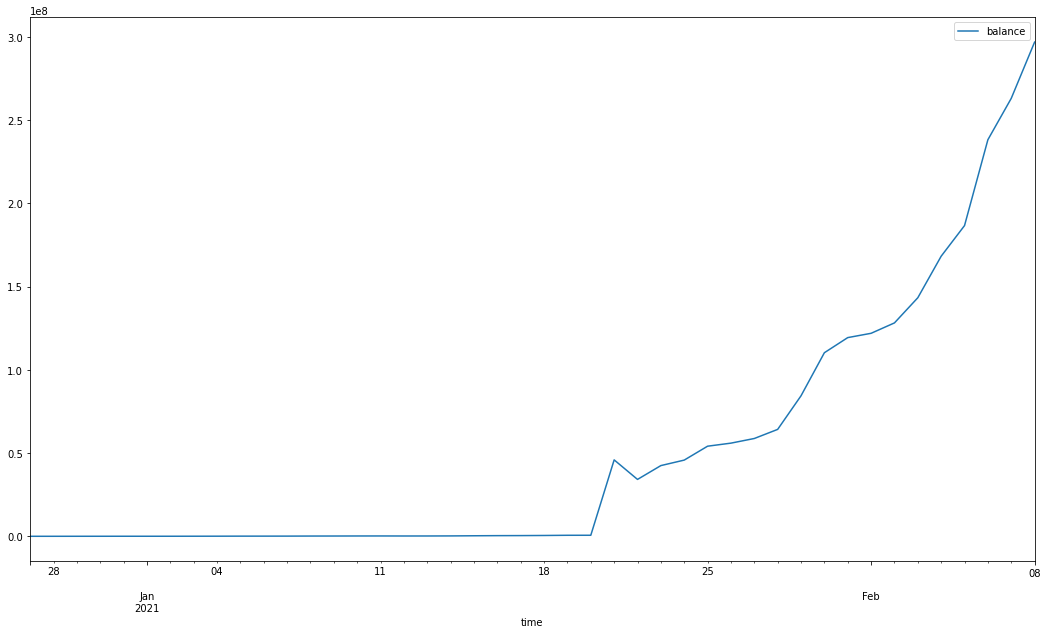

In [37]:
_7_days_pct_changed_symbols_pct = 50
_days_sumed_pct_change_pct = 5
plot_portfolio_for_config(_7_days_pct_changed_symbols_pct, _days_sumed_pct_change_pct, df, _7_days_pct_change_df, _days_sumed_pct_change_df)

## Portfolio 2- 50:10

/home/gull_dev_1/.local/share/virtualenvs/chatbot/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


2020-12-27 00:00:00
Currently Coins in Portfolio: 
 ['XVS', 'SXP', 'AUDIO', 'PCX', 'REN', 'IRIS', 'HARD', 'ZNN', 'CTK', 'TWT', 'SOL', 'KAI', 'BONDLY', 'XEM', 'MTXLT', 'DDX', 'MIN', 'CKB', 'ZRX', 'DUCATO', 'BURGER', 'RGT', 'TRAC', 'GALA', 'LUNA', 'NEAR', 'CAS', 'ATOM', 'DOGE', 'HNS', 'FET', 'MX', 'BEL', 'SPARTA', 'ARRR', 'EGLD', 'PRQ', 'BRG', 'MATIC', 'LINA', 'AVAX', 'BCN', 'TEL', 'HPT', 'GEO']
Current Portfilio Balance: 76492336.0667352


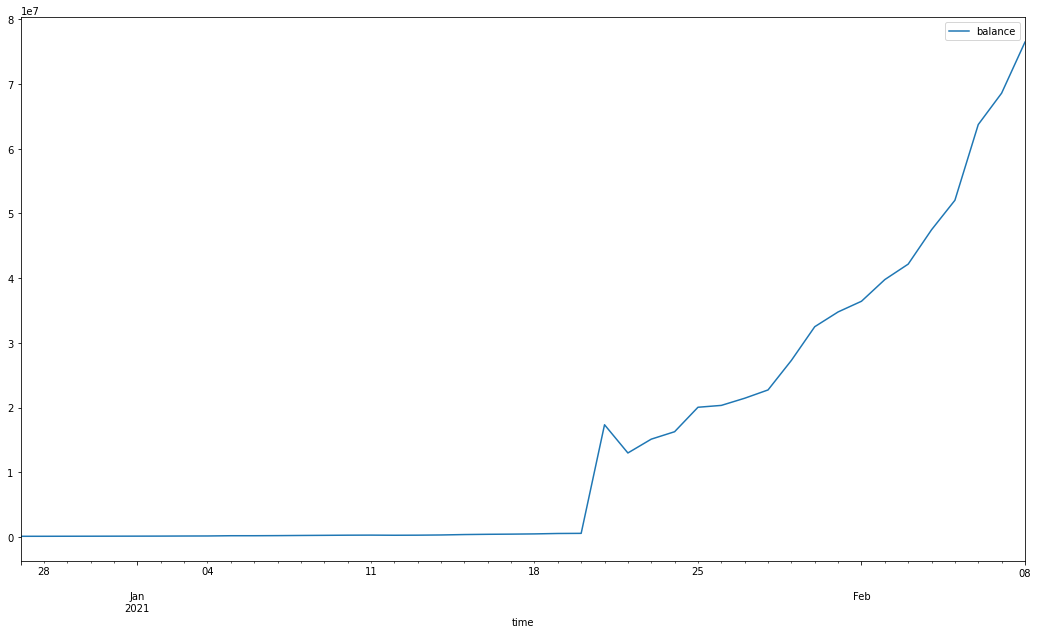

In [38]:
_7_days_pct_changed_symbols_pct = 50
_days_sumed_pct_change_pct = 10
plot_portfolio_for_config(_7_days_pct_changed_symbols_pct, _days_sumed_pct_change_pct, df, _7_days_pct_change_df, _days_sumed_pct_change_df)

## Portfolio 3- 50:20

/home/gull_dev_1/.local/share/virtualenvs/chatbot/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


2020-12-27 00:00:00
Currently Coins in Portfolio: 
 ['PICKLE', 'TRB', 'SAND', 'ADK', 'KNC', 'COTI', 'STORJ', 'EASY', 'MDT', 'TFUEL', 'KSM', 'ROSE', 'BAT', 'COCOS', 'ALGO', 'UTK', 'BTT', 'SRK', 'KAVA', 'CRE', 'AAVE', 'SKL', 'RVN', 'MKR', 'STAX', 'NU', 'OCTO', 'ANKR', 'THETA', 'TRU', 'NEXO', 'FARM', 'INJ', 'AXS', 'vXVS', 'XVS', 'SXP', 'AUDIO', 'PCX', 'REN', 'IRIS', 'HARD', 'ZNN', 'CTK', 'TWT', 'SOL', 'KAI', 'BONDLY', 'XEM', 'MTXLT', 'DDX', 'MIN', 'CKB', 'ZRX', 'DUCATO', 'BURGER', 'RGT', 'TRAC', 'GALA', 'LUNA', 'NEAR', 'CAS', 'ATOM', 'DOGE', 'HNS', 'FET', 'MX', 'BEL', 'SPARTA', 'ARRR', 'EGLD', 'PRQ', 'BRG', 'MATIC', 'LINA', 'AVAX', 'BCN', 'TEL', 'HPT', 'GEO']
Current Portfilio Balance: 17494755.722582996


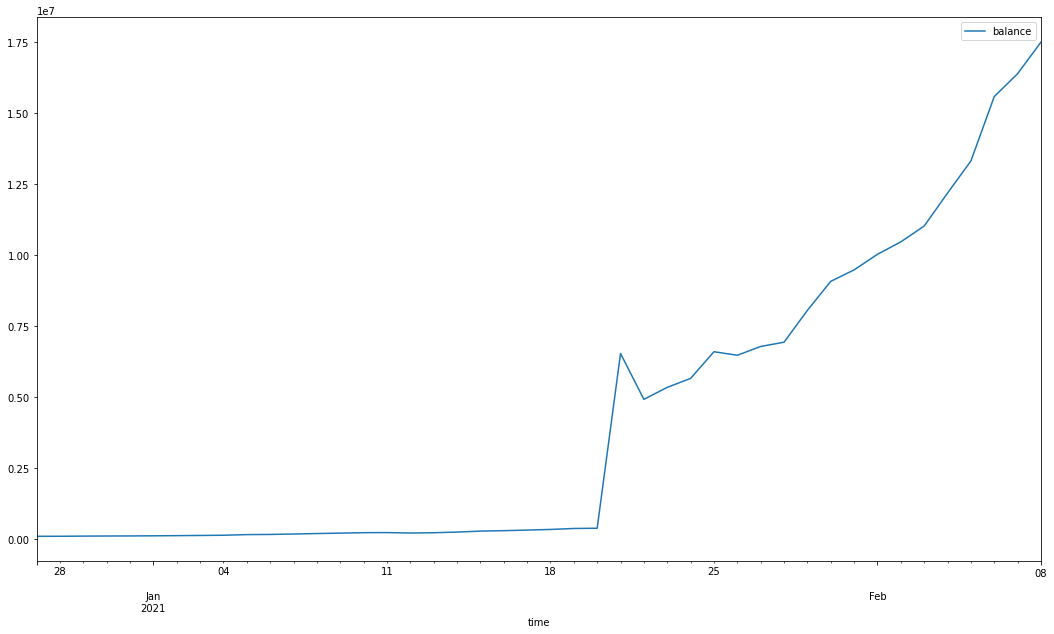

In [39]:
_14_days_pct_changed_symbols_pct = 50
_days_sumed_pct_change_pct = 20
plot_portfolio_for_config(_14_days_pct_changed_symbols_pct, _days_sumed_pct_change_pct, df, _7_days_pct_change_df, _days_sumed_pct_change_df)

## Portfolio 4- 50:30

/home/gull_dev_1/.local/share/virtualenvs/chatbot/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


2020-12-27 00:00:00
Currently Coins in Portfolio: 
 ['OXT', 'FIO', 'WTC', 'SRM', 'XPR', 'BAL', 'OMG', 'WOO', 'VET', 'CELR', 'ORN', 'XHV', 'RLC', 'QTUM', 'FLM', 'ADX', 'BAND', 'CAKE', 'SNX', 'CHSB', 'TOMO', 'MFT', 'BZRX', 'POWR', 'STEEM', 'PROM', 'AGI', 'AST', 'TXL', 'NKN', 'BTMX', 'COMP', 'OCEAN', 'DDIM', 'ONT', 'PICKLE', 'TRB', 'SAND', 'ADK', 'KNC', 'COTI', 'STORJ', 'EASY', 'MDT', 'TFUEL', 'KSM', 'ROSE', 'BAT', 'COCOS', 'ALGO', 'UTK', 'BTT', 'SRK', 'KAVA', 'CRE', 'AAVE', 'SKL', 'RVN', 'MKR', 'STAX', 'NU', 'OCTO', 'ANKR', 'THETA', 'TRU', 'NEXO', 'FARM', 'INJ', 'AXS', 'vXVS', 'XVS', 'SXP', 'AUDIO', 'PCX', 'REN', 'IRIS', 'HARD', 'ZNN', 'CTK', 'TWT', 'SOL', 'KAI', 'BONDLY', 'XEM', 'MTXLT', 'DDX', 'MIN', 'CKB', 'ZRX', 'DUCATO', 'BURGER', 'RGT', 'TRAC', 'GALA', 'LUNA', 'NEAR', 'CAS', 'ATOM', 'DOGE', 'HNS', 'FET', 'MX', 'BEL', 'SPARTA', 'ARRR', 'EGLD', 'PRQ', 'BRG', 'MATIC', 'LINA', 'AVAX', 'BCN', 'TEL', 'HPT', 'GEO']
Current Portfilio Balance: 10103874.716765255


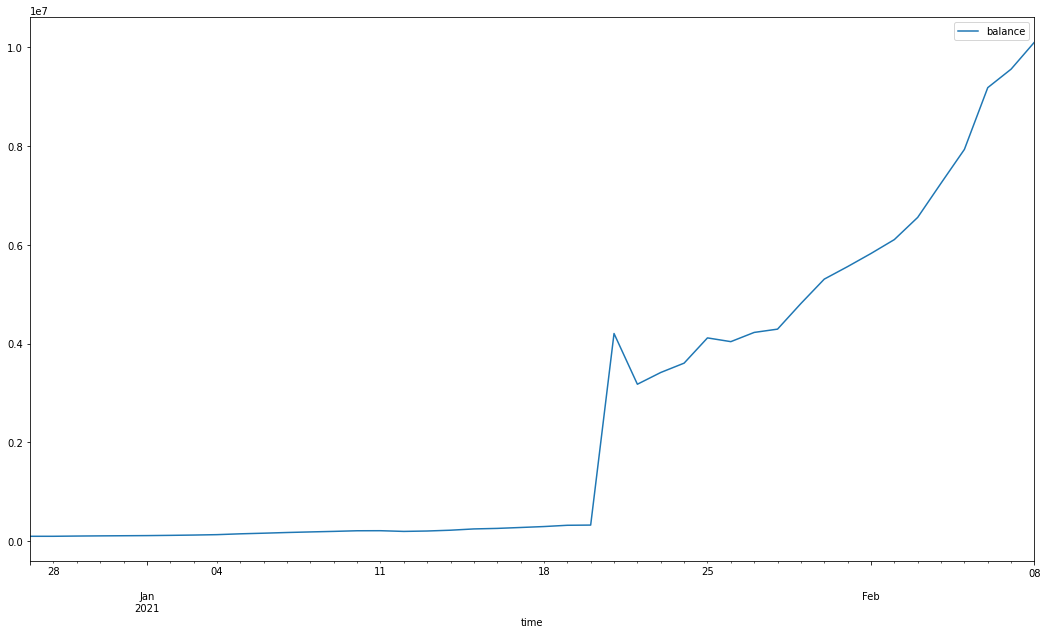

In [40]:
_14_days_pct_changed_symbols_pct = 50
_days_sumed_pct_change_pct = 30
plot_portfolio_for_config(_14_days_pct_changed_symbols_pct, _days_sumed_pct_change_pct, df, _7_days_pct_change_df, _days_sumed_pct_change_df)